# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from scipy.stats import linregress

from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
#lat & lng ranges
lat_range=(-90, 90)
lng_range=(-180,180)

#lists to hold location and cities
lat_lngs = []
cities = []

#random city selection
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#nearest city id for random selection
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #add to list if unique name
    if city not in cities:
        cities.append(city)

len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeatherMap url + api key & modifications needed for call
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = weather_url + "appid=" + weather_api_key + "&units=" + units + "&q="

#print test city 
test = requests.get(f'{query_url}indianapolis').json()
display(test)

{'coord': {'lon': -86.158, 'lat': 39.7684},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 84.18,
  'feels_like': 93.72,
  'temp_min': 79.54,
  'temp_max': 88.14,
  'pressure': 1013,
  'humidity': 78},
 'visibility': 10000,
 'wind': {'speed': 10.36, 'deg': 270, 'gust': 17.27},
 'clouds': {'all': 40},
 'dt': 1627599510,
 'sys': {'type': 2,
  'id': 2002558,
  'country': 'US',
  'sunrise': 1627555260,
  'sunset': 1627606859},
 'timezone': -14400,
 'id': 4259418,
 'name': 'Indianapolis',
 'cod': 200}

In [4]:
# lists to hold data for df creation 
country = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

city_list = []

#run loop & print data request for all cities from random list
counter = 0

print('Beginning Data Retrieval')
print('------------')

for city in cities:
    
    response=requests.get(query_url + city).json()
    
    try:
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        city_list.append(city)
        
        counter += 1
        
        print(f"Processing Records {counter} | {city}")
        
    except:
        print("City not found. Skipping.")
        pass
    
print('------------')
print('Data Retrieval Complete')
print('------------')

Beginning Data Retrieval
------------
Processing Records 1 | great bend
Processing Records 2 | kruisfontein
Processing Records 3 | vaini
City not found. Skipping.
Processing Records 4 | ketchikan
Processing Records 5 | butaritari
Processing Records 6 | enumclaw
Processing Records 7 | rikitea
Processing Records 8 | puerto ayora
Processing Records 9 | hilo
Processing Records 10 | san luis
Processing Records 11 | hualmay
Processing Records 12 | atuona
Processing Records 13 | port alfred
Processing Records 14 | bluff
Processing Records 15 | dikson
Processing Records 16 | rudnichnyy
City not found. Skipping.
Processing Records 17 | college
Processing Records 18 | mount gambier
Processing Records 19 | aklavik
Processing Records 20 | punta arenas
Processing Records 21 | sawakin
Processing Records 22 | yellowknife
Processing Records 23 | alofi
Processing Records 24 | ayan
Processing Records 25 | east london
Processing Records 26 | lorengau
Processing Records 27 | kaseda
Processing Records 28 |

Processing Records 227 | ilulissat
Processing Records 228 | katsuura
Processing Records 229 | veraval
Processing Records 230 | muros
Processing Records 231 | high level
Processing Records 232 | nantucket
Processing Records 233 | jizan
Processing Records 234 | ikwiriri
Processing Records 235 | tiarei
Processing Records 236 | weihe
Processing Records 237 | pedregulho
Processing Records 238 | zhigansk
Processing Records 239 | mar del plata
Processing Records 240 | pringsewu
City not found. Skipping.
City not found. Skipping.
Processing Records 241 | ust-tsilma
Processing Records 242 | karasburg
Processing Records 243 | sinnamary
Processing Records 244 | tromso
City not found. Skipping.
City not found. Skipping.
Processing Records 245 | ahipara
Processing Records 246 | jamestown
Processing Records 247 | teguldet
Processing Records 248 | dhanera
Processing Records 249 | fare
Processing Records 250 | baiyin
Processing Records 251 | novo aripuana
Processing Records 252 | puerto leguizamo
Proc

Processing Records 452 | senaki
Processing Records 453 | saint-ambroise
Processing Records 454 | shingu
Processing Records 455 | pastavy
Processing Records 456 | hofn
City not found. Skipping.
Processing Records 457 | catalao
Processing Records 458 | chicama
Processing Records 459 | praia da vitoria
Processing Records 460 | bristol
Processing Records 461 | ambulu
Processing Records 462 | buala
Processing Records 463 | abhar
Processing Records 464 | kanlagay
Processing Records 465 | dunedin
Processing Records 466 | alyangula
Processing Records 467 | padang
Processing Records 468 | arman
Processing Records 469 | morden
Processing Records 470 | saint-joseph
Processing Records 471 | angoche
Processing Records 472 | itarema
Processing Records 473 | nabire
Processing Records 474 | saint-pierre
Processing Records 475 | hailar
Processing Records 476 | ladan
Processing Records 477 | cairns
Processing Records 478 | maldonado
Processing Records 479 | ojinaga
Processing Records 480 | princeton
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create df
city_df = pd.DataFrame({'City': city_list,
                       'Country': country,
                       'Lat': lat,
                       'Lng': lng,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Date': date})
display(city_df)

#export df to csv
output_df = "../output_data/cities.csv"
city_df.to_csv(output_df, encoding="utf-8", index=False)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,great bend,US,38.3645,-98.7648,100.45,34,43,4.00,1627599640
1,kruisfontein,ZA,-34.0033,24.7314,48.88,85,1,6.58,1627599641
2,vaini,TO,-21.2000,-175.2000,72.66,64,46,13.80,1627599641
3,ketchikan,US,55.3422,-131.6461,69.40,72,76,2.17,1627599641
4,butaritari,KI,3.0707,172.7902,83.95,70,15,12.06,1627599642
...,...,...,...,...,...,...,...,...,...
567,cururupu,BR,-1.8283,-44.8683,75.97,87,4,3.80,1627599705
568,tilichiki,RU,60.4667,166.1000,55.13,47,14,8.61,1627599816
569,esna,EG,25.2934,32.5540,87.19,17,98,7.20,1627599817
570,cedar city,US,37.6775,-113.0619,76.17,44,40,8.05,1627599576


In [6]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.810109,23.431823,68.389283,71.554196,51.430070,7.632343,1.627600e+09
std,33.618769,89.588194,14.158047,20.479938,38.590222,5.758485,8.788095e+01
min,-54.800000,-179.166700,32.070000,6.000000,0.000000,0.000000,1.627599e+09
25%,-8.003400,-54.464550,57.612500,59.000000,10.000000,3.380000,1.627600e+09
50%,25.415900,28.917950,70.350000,77.500000,53.000000,6.150000,1.627600e+09
75%,50.125700,102.334775,78.730000,86.000000,92.000000,9.962500,1.627600e+09
max,78.218600,179.316700,109.200000,100.000000,100.000000,38.160000,1.627600e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
city_df['Humidity'].value_counts().nlargest(n=1)

76    22
Name: Humidity, dtype: int64

Max humidity is not above 100%. No outliers that need to be removed. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

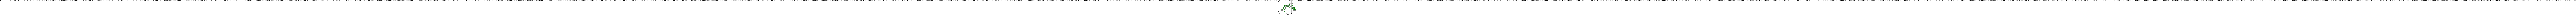

In [22]:
x = city_df['Lat']
y = city_df['Max Temp']

plt.scatter(x, y, c='green', edgecolor='gray')
plt.title(f'City Latitude vs. Temperature (F) ({date})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()


fig.savefig('../output_data/Lat_v_Temp.png')
# plt.figure(figsize=(10,10))
# plt.savefig = "../output_data/Lat_v_WindSpeed.png"
#plt.show()
#plt.savefig("../output_data/Lat_v_Temp.png")
#plt.figure(figsize=(10,2))
plt.show()

This plot shows each city's temperature in coorelation to latitude. The highest temperatures appear to be in the 40th parallel north and the lowest temperatures on the outer edges in both directions. 

## Latitude vs. Humidity Plot

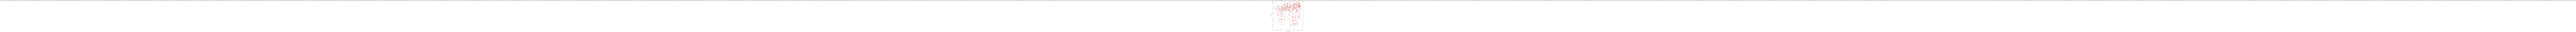

In [9]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Humidity']

plt.scatter(x_values, y_values, c='red', edgecolor='gray')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

fig.savefig("../output_data/Lat_v_Humidity.png")
plt.show()

This plot shows each city's humidity in coorelation to latitude. It appears humidity is pretty wide spread without pattern. There is no clear coorelation. 

## Latitude vs. Cloudiness Plot

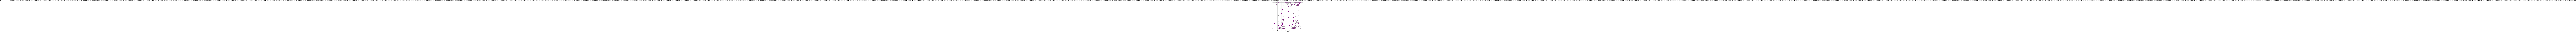

In [23]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.scatter(x_values, y_values, c='purple', edgecolor='gray')
plt.title(f'City Latitude vs. Cloudiness (%) ({date})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/Lat_v_Cloudiness.png")
plt.show()

This plot shows each city's cloudiness in coorelation to latitude. It appears cloudiness percentage is pretty wide spread without pattern. There is no clear coorelation. 

## Latitude vs. Wind Speed Plot

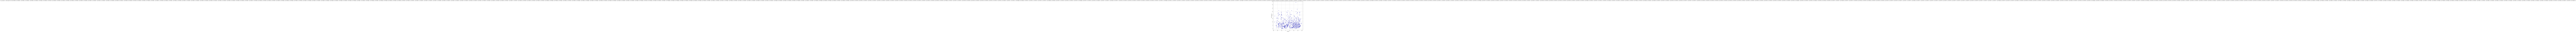

In [11]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Wind Speed']

plt.scatter(x_values, y_values, c='blue', edgecolor='gray')
plt.title(f'City Latitude vs. Wind Speed (%) ({date})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

fig.savefig("../output_data/Lat_v_WindSpeed.png")
plt.show()

This plot shows each city's wind speed percentage in coorelation to latitude. It appears wind speed percentage is pretty wide spread without pattern. There is no clear coorelation. The majority of wind speed percentage is under 20%. It would be interesting to compare wind speed percentage with cloudiness percentage. 

## Linear Regression

In [12]:
def regressplot(x, y):
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,'r-')
    return line_eq

In [13]:
north = city_df.loc[city_df['Lat'] >= 0]
south = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

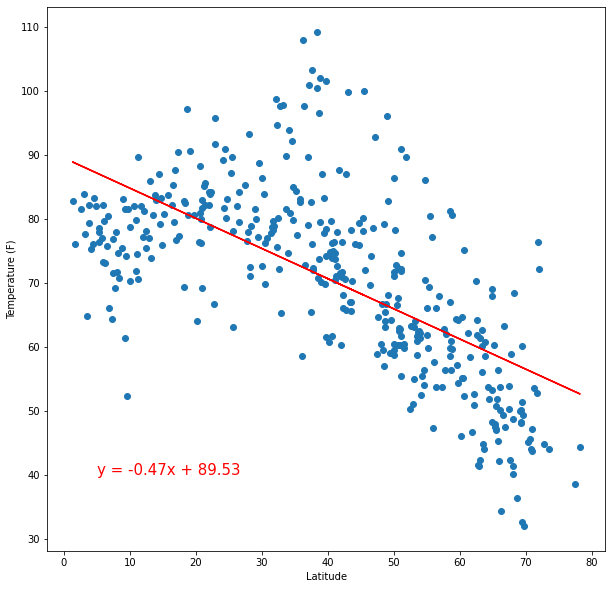

In [14]:
fig=plt.figure(figsize=(10,10))
line_eq = regressplot(x=north['Lat'], y=north['Max Temp'])
plt.annotate(line_eq, (5,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

fig.savefig("../output_data/North_Hem_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

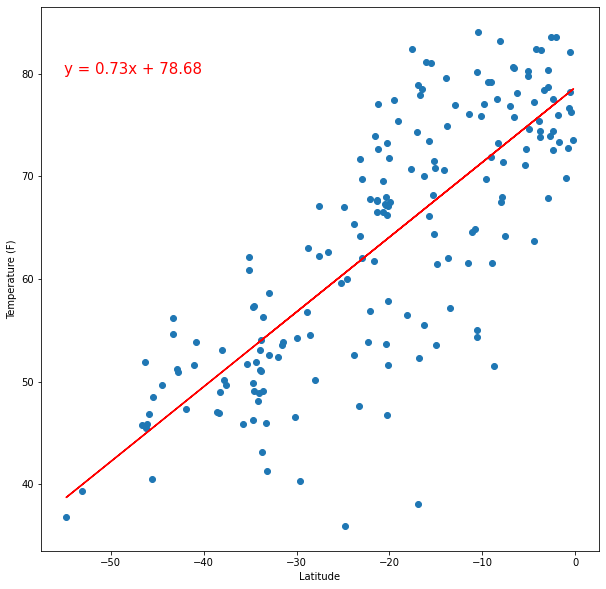

In [15]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Max Temp'])
plt.annotate(linear_regress, (-55,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

fig.savefig("../output_data/South_Hem_Temp.png")
plt.show()

North and South hemisphere temperature are opposite in direction. The highest temperatures still appear to be in the 40th parallel north area as more adequately shown in the Lat vs Max Temp scatter plot. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

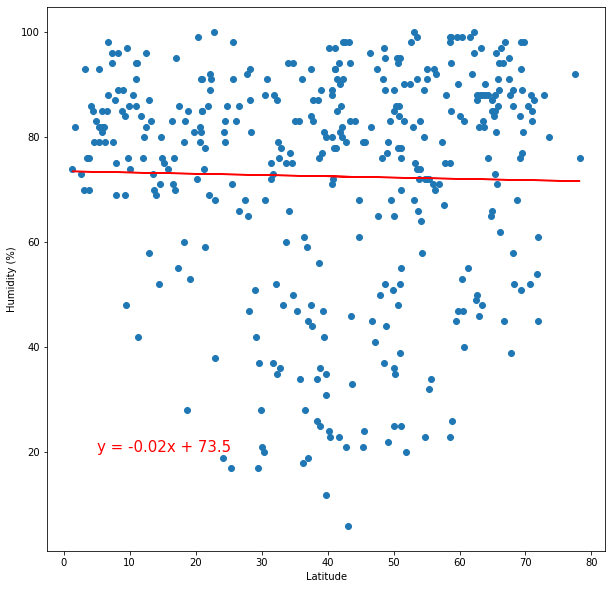

In [16]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Humidity'])
plt.annotate(linear_regress, (5,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

fig.savefig("../output_data/North_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

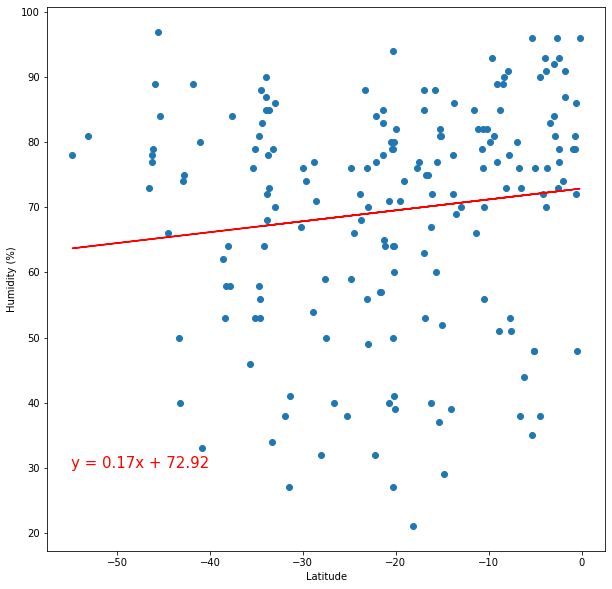

In [17]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Humidity'])
plt.annotate(linear_regress, (-55,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

fig.savefig("../output_data/South_Humidity.png")
plt.show()

These two charts show slightly opposite trend of humidity in relation to the equator. The random city selection also appears to be significantly heavier northen hemisphere based, which may skew the analysis.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

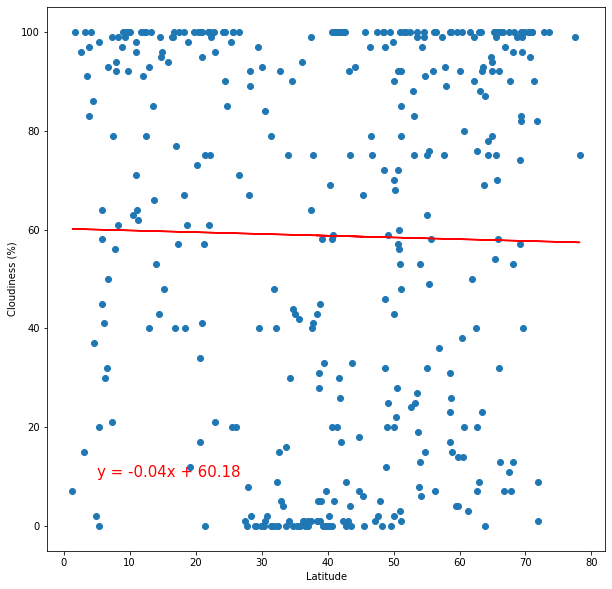

In [18]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Cloudiness'])
plt.annotate(linear_regress, (5,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/North_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

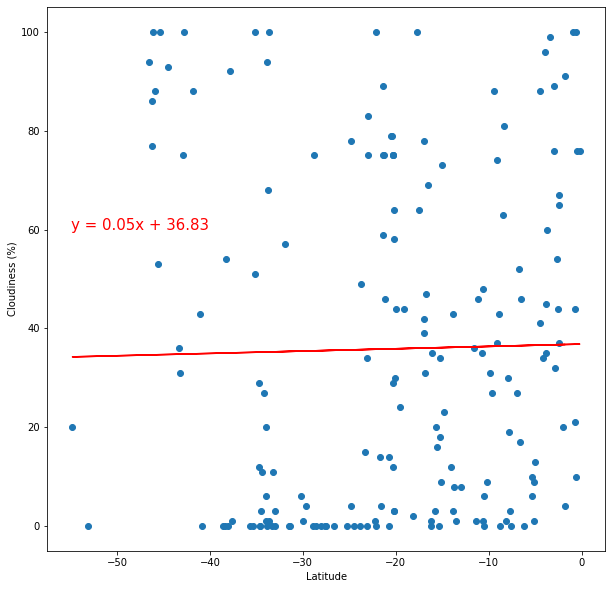

In [19]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Cloudiness'])
plt.annotate(linear_regress, (-55,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/South_Cloud.png")
plt.show()

These two charts show a barely noticeable, slightly opposite trend of cloudiness in relation to the equator. The random city selection also appears to be significantly heavier northen hemisphere based, which may skew the analysis. The northern hemisphere shows multiple cities at 0% and multiple cities at 100% with no pattern to scatter within the middle. The southern hemisphere has more cities at 0% than at any other percentage, but still a few more 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

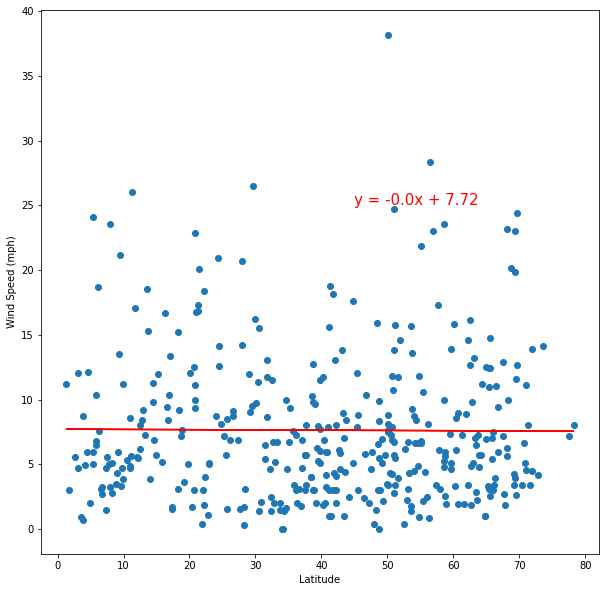

In [20]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Wind Speed'])
plt.annotate(linear_regress, (45,25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

fig.savefig("../output_data/North_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

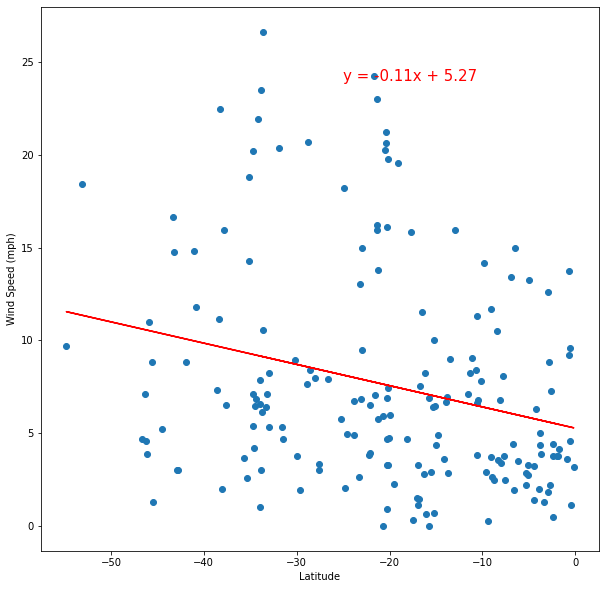

In [21]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Wind Speed'])
plt.annotate(linear_regress, (-25,24), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

fig.savefig("../output_data/South_Wind.png")
plt.show()

These two plots show greater wind in the southern artic region with an overall trend diminishing moving toward the equator. The northern hemisphere shows hardly any change in wind speed, but on average wind is greater in the north.  